In [111]:
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [112]:
df = pd.read_csv('./datasets/SMSSpamCollection', sep='\t', header=None)
df.columns = ['target', 'text']

In [113]:
print(df)

     target                                               text
0       ham  Go until jurong point, crazy.. Available only ...
1       ham                      Ok lar... Joking wif u oni...
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...
3       ham  U dun say so early hor... U c already then say...
4       ham  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5567   spam  This is the 2nd time we have tried 2 contact u...
5568    ham               Will ü b going to esplanade fr home?
5569    ham  Pity, * was in mood for that. So...any other s...
5570    ham  The guy did some bitching but I acted like i'd...
5571    ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [114]:
df['target'] = df['target'].apply(lambda x: 1 if x == 'spam' else 0)

In [115]:
df.target.value_counts(normalize=True)

target
0    0.865937
1    0.134063
Name: proportion, dtype: float64

#### Treinar modelo

In [116]:
X = df['text']
y= df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [117]:
X_train_indices = X_train.index
X_test_indices = X_test.index

X_train_text = df['text'].iloc[X_train_indices]
X_test_text = df['text'].iloc[X_test_indices]

vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_test_tfidf = vectorizer.transform(X_test_text)

In [118]:
model = RandomForestClassifier()

model.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [119]:
y_pred = model.predict(X_test_tfidf)

In [120]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [121]:
y_proba = model.predict_proba(X_test_tfidf)

In [122]:
y_proba

array([[0.99, 0.01],
       [0.84, 0.16],
       [0.99, 0.01],
       ...,
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.94, 0.06]])

In [123]:
#Isolando apenas a probabilidade da classe positiva (ex: é spam)
y_proba_1 = y_proba[:,1]

In [124]:
y_proba_1

array([0.01, 0.16, 0.01, ..., 0.  , 0.01, 0.06])

In [125]:
df_count = y_test.count() + y_train.count()

array([[<Axes: title={'center': '0'}>]], dtype=object)

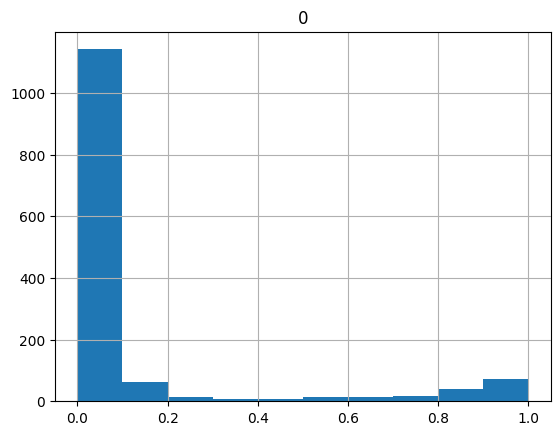

In [126]:
# Histograma, considerando a parte de teste, com a saída das probabilidades da classe positiva (1), ex: é spam
pd.DataFrame(y_proba_1).hist(bins = 10)

# total da coluna / total de tudo
# mudar a escala da contagem

In [127]:
# Gerar o histograma e capturar os bins e as contagens
y_proba_count, bin_edges = np.histogram(y_proba_1, bins=10)

In [128]:
y_proba_count

array([1142,   62,   13,    7,    9,   15,   15,   17,   41,   72])

In [129]:
y_proba_percentage = (y_proba_count / (y_proba_count.sum())) * 100

In [130]:
y_proba_percentage

array([81.98133525,  4.45082556,  0.93323762,  0.50251256,  0.64608758,
        1.07681263,  1.07681263,  1.22038765,  2.94328787,  5.16870065])

In [131]:
df_results = pd.DataFrame({
  'y_proba_1': y_proba_1, # probabiliadde positiva
  'y_test': y_test
})

In [132]:
df_results_filtered = df_results[df_results['y_test'] == 1]

<Axes: >

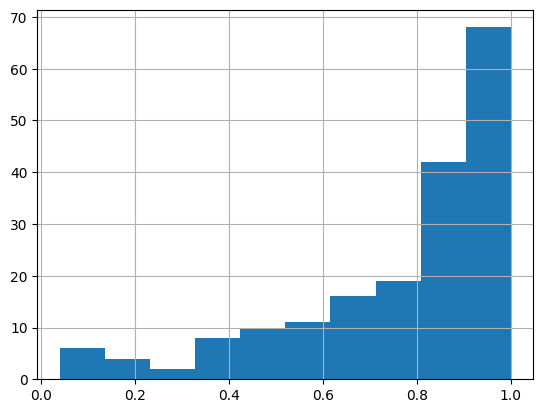

In [133]:
df_results_filtered['y_proba_1'].hist(bins=10)
# Quando a probabilidade é muito baixa, possivelmente o modelo errou
# No meio ele não acerta muito bem
# A maioria que a gente sabe que 

In [134]:
# Gerar o histograma e capturar os bins e as contagens
y_proba_1_filtered = df_results_filtered['y_proba_1']

y_proba_1_filtered_count, bin_edges = np.histogram(y_proba_1_filtered, bins=10)

In [135]:
y_proba_1_filtered_count

array([ 6,  4,  2,  8, 10, 11, 16, 19, 42, 68])

In [136]:
y_proba_filtered_percentage = (y_proba_1_filtered_count / (y_proba_1_filtered_count.sum())) * 100

In [137]:
y_proba_filtered_percentage

array([ 3.22580645,  2.15053763,  1.07526882,  4.30107527,  5.37634409,
        5.91397849,  8.60215054, 10.21505376, 22.58064516, 36.55913978])

In [138]:
df_melt = pd.DataFrame({
  'filtered_proba': y_proba_filtered_percentage, # probabiliadde positiva
  'proba': y_proba_percentage
})

In [139]:
df_melt

,filtered_proba,proba
0,3.225806,81.981335
1,2.150538,4.450826
2,1.075269,0.933238
3,4.301075,0.502513
4,5.376344,0.646088
5,5.913978,1.076813
6,8.602151,1.076813
7,10.215054,1.220388
8,22.580645,2.943288
9,36.559140,5.168701


In [140]:
# Realizar o melt
df_melt = df.melt(var_name='Type', value_name='Percentage')

# Plotar com Seaborn
sns.barplot(x=df_melt.index % 10, y='Percentage', hue='Type', data=df_melt)
plt.title('Comparison of Probabilities')
plt.xlabel('Bins')
plt.ylabel('Percentage')
plt.show()

/home/kemuel/.local/share/virtualenvs/data-science-university-6_sN-WKk/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/kemuel/.local/share/virtualenvs/data-science-university-6_sN-WKk/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/kemuel/.local/share/virtualenvs/data-science-university-6_sN-WKk/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 145 (\x91) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/kemuel/.local/share/virtualenvs/data-science-university-6_sN-WKk/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/kemuel/.local/share/virtualenvs/data-scien

KeyboardInterrupt: 

/tmp/ipykernel_118362/3787660561.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = df_results.groupby('proba_bin')['y_test'].agg(['count', 'sum']).reset_index()


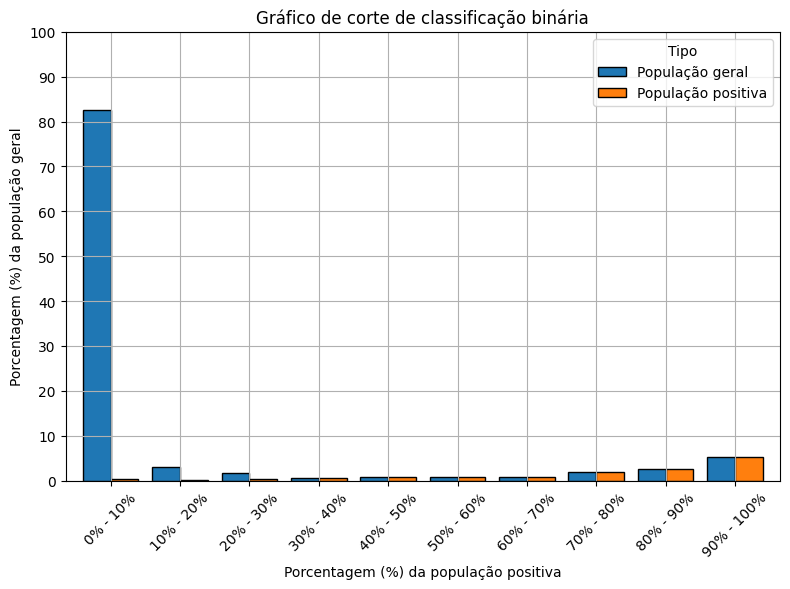

In [ ]:
# Reconstruir o resumo dos bins de probabilidade
df_results['proba_bin'] = pd.cut(df_results['y_proba_1'], bins=10, include_lowest=True)

bin_summary = df_results.groupby('proba_bin')['y_test'].agg(['count', 'sum']).reset_index()

# Ajustando os valores em porcentagem
bin_summary['count_percentage'] = bin_summary['count'] / bin_summary['count'].sum() * 100
bin_summary['sum_percentage'] = bin_summary['sum'] / bin_summary['count'].sum() * 100

# Criar um dataframe resumido com as porcentagens
bin_summary_melted = pd.melt(
  bin_summary[['proba_bin', 'count_percentage', 'sum_percentage']], 
  id_vars='proba_bin', 
  value_vars=['count_percentage', 'sum_percentage'], 
  var_name='Tipo', 
  value_name='Porcentagem'
)

# Ajustar os nomes para 'População geral' e 'População positiva'
bin_summary_melted['Tipo'] = bin_summary_melted['Tipo'].replace(
  {'count_percentage': 'População geral', 'sum_percentage': 'População positiva'}
)

# Converter os bins de probabilidade para uma faixa de 0% a 100%
bin_labels = [f'{int(bin.left * 100)}% - {int(bin.right * 100)}%' for bin in bin_summary['proba_bin']]

# Gráfico de barras lado a lado com porcentagem no eixo X e Y
fig, ax = plt.subplots(figsize=(8, 6))

# Plotar as barras lado a lado
bin_summary_pivot = bin_summary_melted.pivot(index='proba_bin', columns='Tipo', values='Porcentagem')
bin_summary_pivot.plot(kind='bar', ax=ax, width=0.8, edgecolor='black')

ax.set_title('Gráfico de corte de classificação binária')
ax.set_xlabel('Porcentagem (%) da população positiva')
ax.set_ylabel('Porcentagem (%) da população geral')
ax.set_yticks(np.arange(0, 101, 10))  # Definir ticks de 0 a 100 no eixo Y em passos de 10%
ax.set_xticklabels(bin_labels, rotation=45)  # Definir os rótulos do eixo X como porcentagens
ax.grid(True)

plt.tight_layout()
plt.show()


/tmp/ipykernel_118362/3952612848.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = df_results.groupby('proba_bin')['y_test'].agg(['count', 'sum']).reset_index()


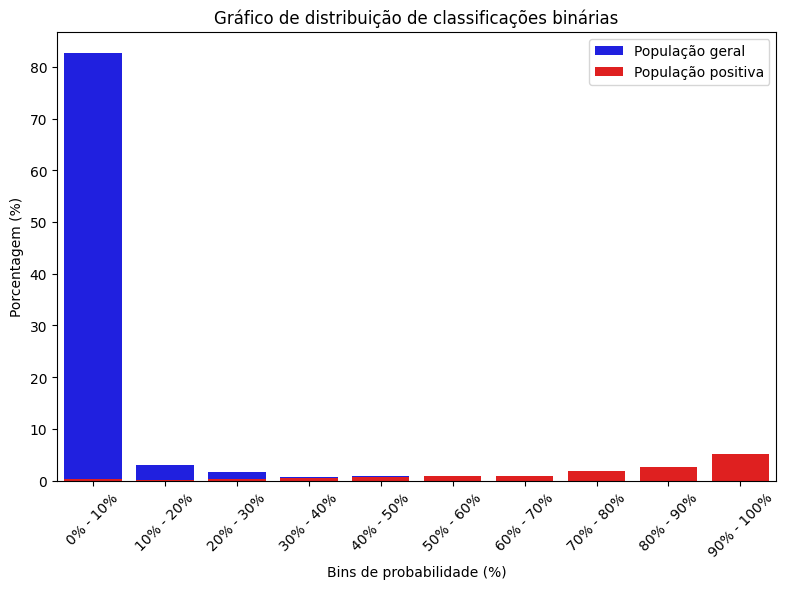

In [ ]:
# Definir os bins de probabilidade e calcular os totais
bins = np.linspace(0, 1, 11)
df_results['proba_bin'] = pd.cut(df_results['y_proba_1'], bins=bins, include_lowest=True)

bin_summary = df_results.groupby('proba_bin')['y_test'].agg(['count', 'sum']).reset_index()

# Calcular porcentagens
bin_summary['count_percentage'] = bin_summary['count'] / bin_summary['count'].sum() * 100
bin_summary['sum_percentage'] = bin_summary['sum'] / bin_summary['count'].sum() * 100

# Usar seaborn para criar gráfico lado a lado
plt.figure(figsize=(8, 6))

# Resumir os dados diretamente com Seaborn
sns.barplot(x='proba_bin', y='count_percentage', data=bin_summary, color='blue', label='População geral')
sns.barplot(x='proba_bin', y='sum_percentage', data=bin_summary, color='red', label='População positiva')

# Adicionar título e rótulos
plt.title('Gráfico de distribuição de classificações binárias')
plt.xlabel('Bins de probabilidade (%)')
plt.ylabel('Porcentagem (%)')
plt.legend()

# Ajustar rótulos do eixo X para porcentagens
plt.xticks(ticks=np.arange(0, len(bins)-1), labels=[f'{int(b.left * 100)}% - {int(b.right * 100)}%' for b in bin_summary['proba_bin']], rotation=45)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

/tmp/ipykernel_118362/319963750.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = df_results.groupby('proba_bin')['y_test'].agg(['count', 'sum']).reset_index()


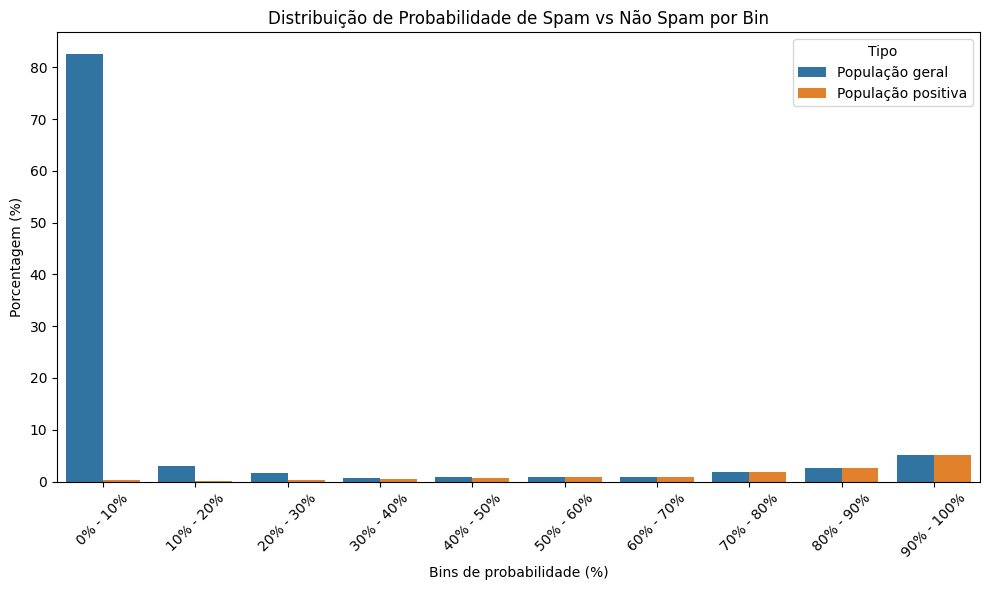

In [ ]:
# Definir os bins de probabilidade e calcular os totais
bins = np.linspace(0, 1, 11)
df_results['proba_bin'] = pd.cut(df_results['y_proba_1'], bins=bins, include_lowest=True)

bin_summary = df_results.groupby('proba_bin')['y_test'].agg(['count', 'sum']).reset_index()

# Calcular porcentagens
bin_summary['count_percentage'] = bin_summary['count'] / bin_summary['count'].sum() * 100
bin_summary['sum_percentage'] = bin_summary['sum'] / bin_summary['count'].sum() * 100

# Preparar os dados no formato "long" usando pd.melt()
bin_summary_melted = pd.melt(bin_summary, 
                             id_vars='proba_bin', 
                             value_vars=['count_percentage', 'sum_percentage'], 
                             var_name='Tipo', 
                             value_name='Porcentagem')

# Ajustar os rótulos de 'Tipo' para 'População geral' e 'População positiva'
bin_summary_melted['Tipo'] = bin_summary_melted['Tipo'].replace({
    'count_percentage': 'População geral', 
    'sum_percentage': 'População positiva'
})

# Converter os bins de probabilidade para uma faixa de 0% a 100%
bin_labels = [f'{int(bin.left * 100)}% - {int(bin.right * 100)}%' for bin in bin_summary['proba_bin']]

# Criar o gráfico lado a lado com seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='proba_bin', y='Porcentagem', hue='Tipo', data=bin_summary_melted, dodge=True)

# Ajustar título e rótulos
plt.title('Distribuição de Probabilidade de Spam vs Não Spam por Bin')
plt.xlabel('Bins de probabilidade (%)')
plt.ylabel('Porcentagem (%)')

# Ajustar rótulos do eixo X para porcentagens
plt.xticks(ticks=np.arange(len(bin_labels)), labels=bin_labels, rotation=45)

# Mostrar o gráfico
plt.tight_layout()
plt.show()